The objective of this project is to develop a model that will be able to predict the cars prices. To do so, first we are gonna clean the dataset and predict the prices using diffent algoritms until we find the one with the best performance. Let's get it started!

**1 - Import and take a quick look at the data**

In [195]:
import pandas as pd
cars = pd.read_csv('train-data.csv', index_col = 0)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [196]:
print(cars.head())

                               Name    Location  Year  ...  Seats  New_Price  Price
0            Maruti Wagon R LXI CNG      Mumbai  2010  ...    5.0        NaN   1.75
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015  ...    5.0        NaN  12.50
2                      Honda Jazz V     Chennai  2011  ...    5.0  8.61 Lakh   4.50
3                 Maruti Ertiga VDI     Chennai  2012  ...    7.0        NaN   6.00
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013  ...    5.0        NaN  17.74

[5 rows x 13 columns]


In [198]:
# converting the columns' titles to lowercase letters to ease the coding
cars.rename(columns = str.lower, inplace = True) 
cars.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**2 - Drop variables with no predictive power: name and new_price**

**Variable name**

In [199]:
cars["name"].head()

0              Maruti Wagon R LXI CNG
1    Hyundai Creta 1.6 CRDi SX Option
2                        Honda Jazz V
3                   Maruti Ertiga VDI
4     Audi A4 New 2.0 TDI Multitronic
Name: name, dtype: object

In [200]:
len(cars["name"].value_counts())
# Variable name has too many categories

1876

In [201]:
# maybe by converting cars' name to cars' brand we can both decrease the number of categories and make the variable more informative
# First, let's convert cars'name to cars'brand
cars['name'] = cars['name'].apply(lambda x: x.split(' ')[0])
cars['name'].head()

0     Maruti
1    Hyundai
2      Honda
3     Maruti
4       Audi
Name: name, dtype: object

In [202]:
len(cars['name'].value_counts())

# Even after the conversion the number of categories of this variable is too large. It is better to drop it.

31

**Variable new_price**

In [203]:
cars["new_price"].head()
# It is possible to perceive we have a lot of missing data

0          NaN
1          NaN
2    8.61 Lakh
3          NaN
4          NaN
Name: new_price, dtype: object

In [204]:
missing_values_perc = cars["new_price"].isnull().sum()/len(cars)
print("{:.2%} of missing values".format(missing_values_perc))

# Once the amount of missing values is too large, it is better to drop this variable.

86.31% of missing values


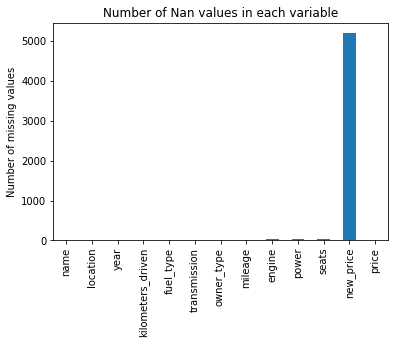

In [205]:
import matplotlib.pyplot as plt
cars.isna().sum().plot(kind = 'bar')
plt.ylabel('Number of missing values')
plt.title('Number of Nan values in each variable')
plt.show()

In [206]:
# dropping the variables with no predictive power
cars.drop(["name", "new_price"], axis = 1, inplace = True)
cars.columns

Index(['location', 'year', 'kilometers_driven', 'fuel_type', 'transmission',
       'owner_type', 'mileage', 'engine', 'power', 'seats', 'price'],
      dtype='object')

 **3 - Feature engineering: fuel_type, owner_type, mileage, engine, power**

**Variable Fuel_type**

In [207]:
cars["fuel_type"].head()

0       CNG
1    Diesel
2    Petrol
3    Diesel
4    Diesel
Name: fuel_type, dtype: object

In [208]:
cars["fuel_type"].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: fuel_type, dtype: int64

In [209]:
# Converting LPG and CNG into a unique value: Gas
values = ['CNG','LPG']
cars.loc[cars['fuel_type'].isin(values), 'fuel_type'] = 'Gas'

cars['fuel_type'].value_counts()

Diesel      3205
Petrol      2746
Gas           66
Electric       2
Name: fuel_type, dtype: int64

In [210]:
# Once we have only two rows in which fuel type is electric there will not be a problem if we drop them.
eletr_idx = cars[cars["fuel_type"] == "Electric"].index
cars.drop(eletr_idx, inplace = True)

In [211]:
cars['fuel_type'].value_counts()

Diesel    3205
Petrol    2746
Gas         66
Name: fuel_type, dtype: int64

**Variable Owner_type**

In [212]:
cars["owner_type"].head()

0     First
1     First
2     First
3     First
4    Second
Name: owner_type, dtype: object

In [213]:
cars["owner_type"].value_counts()

First             4927
Second             968
Third              113
Fourth & Above       9
Name: owner_type, dtype: int64

In [214]:
# Converting values Third and Fourth & Above into one unique value: Third & Above
values = ["Third", "Fourth & Above"]
cars.loc[cars["owner_type"].isin(values), "owner_type"] = "Third & Above"

cars["owner_type"].value_counts()

First            4927
Second            968
Third & Above     122
Name: owner_type, dtype: int64

**Variable Mileage**

In [215]:
cars["mileage"].head()

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: mileage, dtype: object

In [216]:
# How many values have the suffix km/kg or kmpl?
suffix_kmkg = []
suffix_kmpl = []
other_suffix = []

for index, row in cars.iterrows():
  if str(row["mileage"]).endswith("km/kg"):
    suffix_kmkg.append(row["mileage"])
  elif str(row["mileage"]).endswith("kmpl"):
    suffix_kmpl.append(row["mileage"])
  else:
    other_suffix.append(row['mileage'])

print("end with km/kg:", len(suffix_kmkg))
print("end with kmpl:", len(suffix_kmpl))
print("end with other:", len(other_suffix))

end with km/kg: 66
end with kmpl: 5951
end with other: 0


In [217]:
# Converting the kmkg to kmpl, keep only digits and converting to float 
correct_mileage = []

for i in cars.mileage:
  if str(i).endswith('km/kg'):
    i = i[:-6]
    i = float(i)*1.40
    correct_mileage.append(float(i))
  elif str(i).endswith('kmpl'):
    i = i[:-6]
    correct_mileage.append(float(i))


In [218]:
cars['mileage'] = correct_mileage

In [219]:
cars['mileage'].head()

0    37.24
1    19.60
2    18.00
3    20.70
4    15.00
Name: mileage, dtype: float64

In [220]:
# verify whether the conversion worked as expected
assert cars['mileage'].dtype == 'float'

**Variable Engine**

In [221]:
cars["engine"].head()

0     998 CC
1    1582 CC
2    1199 CC
3    1248 CC
4    1968 CC
Name: engine, dtype: object

In [222]:
# How many values have the suffix CC or other suffixes?
suffix_cc = []
other_suffix = []

for index, row in cars.iterrows():
  if str(row["engine"]).endswith("CC"):
    suffix_cc.append(row["engine"])
  else:
    other_suffix.append(row["engine"])

print("end with cc:", len(suffix_cc))
print("others:", len(other_suffix))

end with cc: 5981
others: 36


In [223]:
# identifying the indexes of missing values
engine_missing = cars[cars['engine'].isnull()].index
print(len(engine_missing))

# The number of values that not ends with cc and the number of missing values are equal
# Are the values that do not end with cc the missing values?

36


In [224]:
# indetifying the indexes of values that do not end with CC
no_end_cc = []

for index, row in cars.iterrows():
  if str(row['engine']).endswith('CC') == False:
    no_end_cc.append(index)

print(no_end_cc)

[194, 208, 733, 749, 1294, 1327, 1385, 1460, 2074, 2096, 2264, 2325, 2335, 2530, 2542, 2623, 2668, 2737, 2780, 2842, 3272, 3404, 3520, 3522, 3810, 4011, 4152, 4229, 4577, 4604, 4697, 4712, 4952, 5015, 5185, 5270]


In [225]:
# Function to compare whether two list are equal
def check_if_equal(list1, list2):
  ''' Compare two list to verify whether their elements are equal'''
  if len(list1) != len(list2):
    return False
  else:
    return sorted(list1) == sorted(list2)

In [226]:
# Let's verify whether the values that end with other suffixes are actually the missing values
check_if_equal(no_end_cc, engine_missing)

True

In [227]:
# Function to drop the suffixes and convert to float
def strip_convert(df, col_name, str_to_remove, data_type):
  '''Drop a specific suffix from each value of a DataFrame column and convert the value to a specific type.'''

  for item in [col_name, str_to_remove, data_type]:
    if (not isinstance(df, pd.core.frame.DataFrame)) or (not isinstance(item, str)):
      raise ValueError('df must be a DataFrame and col_name, str_to_remove and data_type must be strings')

  df[col_name] = df[col_name].str.strip(str_to_remove)
  return df[col_name].astype(data_type)

In [228]:
cars['engine'] = strip_convert(cars, 'engine', 'CC', 'float')

In [229]:
cars['engine'].head()

0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: engine, dtype: float64

**Variable Power**

In [230]:
cars["power"].head()

0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
Name: power, dtype: object

In [231]:
# How many values end with bhp or with other suffixes?
suffix_bhp = []
other_suffix = []

for index, row in cars.iterrows():
  if str(row["power"]).endswith("bhp"):
    suffix_bhp.append(row["power"])
  else:
    other_suffix.append(row["power"])

print("end with bhp:", len(suffix_bhp))
print("others:", len(other_suffix))

end with bhp: 5981
others: 36


In [232]:
# identifying the indexes of missing values
power_missing = cars[cars['power'].isnull()].index
print(len(power_missing))

36


In [233]:
# indetifying the indexes of values that do not end with bhp
no_end_bhp = []

for index, row in cars.iterrows():
  if str(row['power']).endswith('bhp') == False:
    no_end_bhp.append(index)

print(no_end_bhp)

[194, 208, 733, 749, 1294, 1327, 1385, 1460, 2074, 2096, 2264, 2325, 2335, 2530, 2542, 2623, 2668, 2737, 2780, 2842, 3272, 3404, 3520, 3522, 3810, 4011, 4152, 4229, 4577, 4604, 4697, 4712, 4952, 5015, 5185, 5270]


In [234]:
check_if_equal(power_missing, no_end_bhp)

# Great! The values that end with other suffixes are actually the missing values

True

In [236]:
# let's convert the string 'null ' to nan
import numpy as np
cars.loc[cars['power'] == 'null ', 'power'] = np.nan 

In [237]:
# now the code is goint to produce the expected result
cars["power"] = strip_convert(cars, 'power', 'bhp', 'float')
cars['power'].head()

0     58.16
1    126.20
2     88.70
3     88.76
4    140.80
Name: power, dtype: float64

**Descriptive statistics**

**Correlation matrix**

In [238]:
corr_matrix = cars.corr()
corr_matrix

# Which is the variable that is more correlated with the price?
corr_matrix["price"].sort_values(ascending = False)

price                1.000000
power                0.772837
engine               0.658855
year                 0.305355
seats                0.052262
kilometers_driven   -0.011480
mileage             -0.292591
Name: price, dtype: float64

In [239]:
cars.pivot_table(index = "transmission", columns = "fuel_type", values = 'price')

fuel_type,Diesel,Gas,Petrol
transmission,,,
Automatic,24.583078,NaN,11.258738
Manual,6.636190,3.360758,4.113947


**Plots**

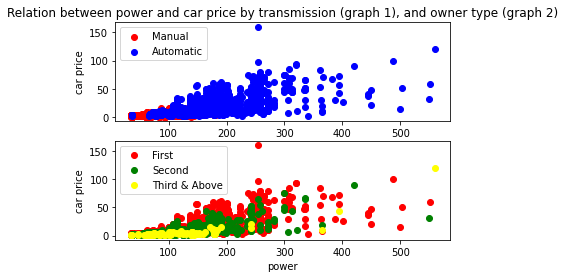

In [240]:
# Once the power is the variable more correlated with price, let's see plot this relation
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)

transm_manual = cars[cars["transmission"] == "Manual"]
transm_automatic = cars[cars["transmission"] == "Automatic"]

first = cars[cars["owner_type"] == "First"]
second = cars[cars["owner_type"] == "Second"]
third = cars[cars["owner_type"] == "Third & Above"]

ax[0].scatter(transm_manual["power"], transm_manual["price"], color = "r", label = "Manual")
ax[0].scatter(transm_automatic["power"], transm_automatic["price"], color = "b", label = "Automatic")
ax[0].set_ylabel("car price")
ax[0].set_title("Relation between power and car price by transmission (graph 1), and owner type (graph 2)")
ax[0].legend()

ax[1].scatter(first["power"], first["price"], color = "r", label = "First")
ax[1].scatter(second["power"], second["price"], color = "green", label = "Second")
ax[1].scatter(third["power"], third["price"], color = "yellow", label = "Third & Above")
ax[1].set_ylabel("car price")
ax[1].set_xlabel("power")
ax[1].legend()


**Preparating the dataset to Machine Learning**

In [242]:
# split the data into predictors and label
cars_predictors = cars.drop("price", axis = 1)
cars_values = cars["price"].copy()

In [243]:
# pipeline with all the transformations required to make the data ready to use
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attributes = ["year", "kilometers_driven", "mileage",
                  "engine", "power", "seats"]
cat_attributes = ["location", "fuel_type", "transmission", "owner_type"]

num_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy="median")),
                         ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy="most_frequent")),
                         ("encoder", OneHotEncoder(sparse = False))
])

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attributes),
                                   ("cat", cat_pipeline, cat_attributes)

])

In [244]:
# cars predictors trasnformed
cars_train_pred = full_pipeline.fit_transform(cars_predictors)

**Is the relationship between predictors and the dependent variable linear?**

In [245]:
# let's obtain the predicted values and the residuals
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(cars_train_pred, cars_values)
predictions = lin_reg.predict(cars_train_pred)
cars_residuals = cars_values - predictions

In [246]:
std_residuals = cars_residuals - cars_residuals.mean() / cars_residuals.std()

Text(0, 0.5, 'Residuals')

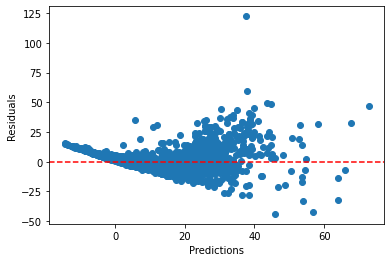

In [247]:
# let's the residuals against the fitted values
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(predictions, std_residuals)
ax.axhline(y = 0, color = 'r', linestyle = '--')
ax.set_xlabel('Predictions')
ax.set_ylabel('Residuals')


The residuals are not randomly scattered around zero. Then, it is likely the relationship is not linear

---



**Linear Regression**

In [248]:
# Although we are not dealing with linear data. Let's try a linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(cars_train_pred, cars_values)

LinearRegression()

In [249]:
# Let's use some instances from cars_predictors dataset to see how the model makes predictions
some_instances = cars_predictors.iloc[:5]
some_values = cars_values.iloc[:5]

In [250]:
# apply the transformation to the data
some_instances_prepared = full_pipeline.transform(some_instances)

In [251]:
lin_reg_predictions = lin_reg.predict(some_instances_prepared)
print(lin_reg_predictions)

[-2.32907978 12.85539444  2.39006636  2.9346673  17.81956371]


In [304]:
# compare the predictions to the actual values
df = pd.DataFrame({
                   "Actual_values": some_values,
                   "Predictions": lin_reg_predictions
                   })
print(df)

   Actual_values  Predictions
0           1.75    -2.329080
1          12.50    12.855394
2           4.50     2.390066
3           6.00     2.934667
4          17.74    17.819564


In [253]:
# let's verify the model performance using the same dataset that was used to train the model
cars_predictions = lin_reg.predict(cars_train_pred)

In [254]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(cars_values, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

6.0895003977285995


In [255]:
# check the performance of the model by cross-validation
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, cars_train_pred, cars_values, cv = 10,
                         scoring = "neg_mean_squared_error")

lin_reg_rmse = np.sqrt(-scores)

Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [256]:
# function to print the scores
def display_scores(scores):
  print("Scores:",scores)
  print("Mean:",scores.mean())
  print("Standard Deviation:",scores.std())

In [257]:
display_scores(lin_reg_rmse)

Scores: [ 6.26203383  6.07497431  6.24202106 11.01692442  5.94008032  5.50509007
  6.99362833  5.81427676  5.50041633  6.03123959]
Mean: 6.538068500971588
Standard Deviation: 1.546870611696441


As the score on the training set (6.08) is not that different from the mean score on the validation sets (6.53) it seems overfitting is not a problem.

**Linear Regression with Polynomial Features**

In [258]:
# Once we are dealing with non-linear data let's try a polynomial features transformation before train the model with a linear regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [259]:
# Polynomial Features
cars_pred_poly = poly_features.fit_transform(cars_train_pred)

In [260]:
# Train the Polynomial regression model
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(cars_pred_poly, cars_values)


LinearRegression()

In [261]:
# polynomial transformation of some instances
poly_instances = poly_features.fit_transform(some_instances_prepared)

In [306]:
lin_reg_poly_predictions = lin_reg_poly.predict(poly_instances)
print(lin_reg_poly_predictions)

[ 2.17888758 10.22039618  3.51323665  3.86006324 17.7457239 ]


In [307]:
# comparing the actual values with the predictions and polynomial predictions
df1 = pd.DataFrame({
                    "Actual_values": some_values,
                    "Lin_Reg_predict": lin_reg_predictions,
                    "Lin_Reg_Poly_predict": lin_reg_poly_predictions
                    })
print(df1)

   Actual_values  Lin_Reg_predict  Lin_Reg_Poly_predict
0           1.75        -2.329080              2.178888
1          12.50        12.855394             10.220396
2           4.50         2.390066              3.513237
3           6.00         2.934667              3.860063
4          17.74        17.819564             17.745724


In [264]:
# The performance of lin_reg_poly on the training set
lin_reg_poly_predictions = lin_reg_poly.predict(cars_pred_poly)

In [265]:
lin_poly_mse = mean_squared_error(cars_values, lin_reg_poly_predictions)
lin_poly_rmse = np.sqrt(lin_poly_mse)
lin_poly_rmse

4.032339279568432

In [266]:
# Check the performance of the model by cross-validation
poly_scores = cross_val_score(lin_reg, cars_pred_poly, cars_values, cv = 10,
                         scoring = "neg_mean_squared_error")

poly_reg_rmse = np.sqrt(-poly_scores)

In [267]:
display_scores(poly_reg_rmse)

Scores: [ 4.37524487  4.2471804   4.3698405  45.51332205  3.90406501  4.66549917
  5.68734163  3.81986055  3.80550767  4.64574648]
Mean: 8.503360833144214
Standard Deviation: 12.347787206960177


**Support Vector Machine**

In [ ]:
# once we suspect the data are not linear we are going to use SVR

# let's find the most appropriate values to the hyperparameters by means of GRID SEARCH
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
              {'degree':[2,3,5,7,9],
               'C': [0.01, 0.1, 1, 10, 100],
               'epsilon': [1, 1.5, 2, 2.5, 3, 5, 7]}
]

svm_poly_reg = SVR()
grid_search = GridSearchCV(svm_poly_reg, param_grid, cv = 10,
                           scoring = "neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(cars_train_pred, cars_values)

grid_search.best_params_

{'C': 100, 'degree': 2, 'epsilon': 1.5}

In [309]:
# SVM performance on the training set
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = 'poly', degree = 2,
                   epsilon = 1.5, C = 100)
svm_poly_reg.fit(cars_train_pred, cars_values) 

SVR(C=100, degree=2, epsilon=1.5, kernel='poly')

In [310]:
svm_reg_predict = svm_poly_reg.predict(some_instances_prepared)
print(svm_reg_predict)

[ 3.00948763 10.03524057  3.61632329  4.49984696 16.99511609]


In [311]:
# comparing the actual values with the predictions
df1 = pd.DataFrame({
                    "Actual_values": some_values,
                    "Lin_Reg_predict": lin_reg_predictions,
                    "Lin_Reg_Poly_predict": lin_reg_poly_predictions,
                    "SVM_poly_predict": svm_reg_predict})
print(df1)

   Actual_values  Lin_Reg_predict  Lin_Reg_Poly_predict  SVM_poly_predict
0           1.75        -2.329080              2.178888          3.009488
1          12.50        12.855394             10.220396         10.035241
2           4.50         2.390066              3.513237          3.616323
3           6.00         2.934667              3.860063          4.499847
4          17.74        17.819564             17.745724         16.995116


In [312]:
# The performance on the training set
svm_predictions = svm_poly_reg.predict(cars_train_pred)

In [313]:
svm_poly_mse = mean_squared_error(cars_values, svm_predictions)
svm_poly_rmse = np.sqrt(lin_poly_mse)
svm_poly_rmse

4.032339279568432

In [282]:
# check the performance with cross-validation
from sklearn.svm import LinearSVR
svm_poly_reg = SVR(kernel = 'poly', degree = 2, epsilon = 1.5, C = 100)

scores = cross_val_score(svm_poly_reg, cars_train_pred, cars_values, cv = 10,
                         scoring = "neg_mean_squared_error")

svm_rmse = np.sqrt(-scores)

display_scores(svm_rmse)

Scores: [ 4.39975968  4.33342591  4.47928951 67.09140159  3.98471351  4.31143272
  5.68015868  3.5157416   3.86903802  4.6596912 ]
Mean: 10.632465242199466
Standard Deviation: 18.827471174132754


**Decision Tree**

In [314]:
# let's find the most appropriate values to the hyperparameters by means of GRID SEARCH

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = [
              {"max_depth":[1, 3, 5, 7, 9, 11]}
]

tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv = 10,
                           scoring = "neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(cars_train_pred, cars_values)

grid_search.best_params_

{'max_depth': 7}

In [315]:
# training the model
tree_reg = DecisionTreeRegressor(max_depth=7, random_state=42)
tree_reg.fit(cars_train_pred, cars_values)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [316]:
tree_reg_predict = tree_reg.predict(some_instances_prepared)
print(tree_reg_predict)

[ 2.42888383  7.24868421  3.69445455  4.88283871 13.95916667]


In [317]:
df1 = pd.DataFrame({
                    "Actual_values": some_values,
                    "Lin_Reg_predict": lin_reg_predictions,
                    "Lin_Reg_Poly_predict": lin_reg_poly_predictions,
                    "SVM_poly_predict": svm_reg_predict,
                    "Tree_reg_predict": tree_reg_predict
                    })
print(df1)

   Actual_values  Lin_Reg_predict  ...  SVM_poly_predict  Tree_reg_predict
0           1.75        -2.329080  ...          3.009488          2.428884
1          12.50        12.855394  ...         10.035241          7.248684
2           4.50         2.390066  ...          3.616323          3.694455
3           6.00         2.934667  ...          4.499847          4.882839
4          17.74        17.819564  ...         16.995116         13.959167

[5 rows x 5 columns]


In [318]:
# The performance on the training set
tree_predictions = tree_reg.predict(cars_train_pred)

In [319]:
from sklearn.metrics import mean_squared_error
tree_mse = mean_squared_error(cars_values, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

3.395254248569031

In [320]:
# the performance with cross validation
tree_scores = cross_val_score(tree_reg, cars_train_pred, cars_values, cv = 10,
                         scoring = "neg_mean_squared_error")

tree_rmse = np.sqrt(-tree_scores)

In [ ]:
display_scores(tree_rmse)

Scores: [4.7506218  5.00297233 4.77380478 4.65435922 4.01995213 4.74300037
 5.63754282 5.7762297  6.29056684 5.79685133]
Mean: 5.144590130691052
Standard Deviation: 0.6602906873732709


**KNN**

In [321]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = [
              {"n_neighbors":[1, 2, 4, 6, 8, 10]}
]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, cv = 10,
                           scoring = "neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(cars_train_pred, cars_values)

grid_search.best_params_

{'n_neighbors': 10}

In [322]:
# train the model
knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(cars_train_pred, cars_values)

KNeighborsRegressor(n_neighbors=10)

In [323]:
#Let's do some predictions
knn_reg_predict = knn_reg.predict(some_instances_prepared)
print(tree_reg_predict)

[ 2.42888383  7.24868421  3.69445455  4.88283871 13.95916667]


In [324]:
df1 = pd.DataFrame({
                    "Actual_values": some_values,
                    "Lin_Reg_predict": lin_reg_predictions,
                    "Lin_Reg_Poly_predict": lin_reg_poly_predictions,
                    "SVM_poly_predict":svm_reg_predict,
                    "Tree_reg_predict": tree_reg_predict,
                    "knn_reg_predict":knn_reg_predict
                    })
print(df1)

   Actual_values  Lin_Reg_predict  ...  Tree_reg_predict  knn_reg_predict
0           1.75        -2.329080  ...          2.428884            2.602
1          12.50        12.855394  ...          7.248684           10.571
2           4.50         2.390066  ...          3.694455            3.764
3           6.00         2.934667  ...          4.882839            6.425
4          17.74        17.819564  ...         13.959167           19.996

[5 rows x 6 columns]


In [ ]:
# The performance on the training set
knn_predictions = knn_reg.predict(cars_train_pred)

In [ ]:
knn_mse = mean_squared_error(cars_values, knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

4.194397572775409

In [ ]:
# the performance with cross validation
knn_scores = cross_val_score(knn_reg, cars_train_pred, cars_values, cv = 10,
                         scoring = "neg_mean_squared_error")

knn_rmse = np.sqrt(-knn_scores)

In [ ]:
display_scores(knn_rmse)

Scores: [4.84513472 4.22413896 4.56001804 5.5284974  3.87506568 4.83468593
 5.28560252 4.03766724 4.3269348  5.57399262]
Mean: 4.709173791912194
Standard Deviation: 0.5775795873030269


In [ ]:
compare_algorit = pd.DataFrame(
    {'Algoritms':['Linear_Reg', 'SVM',
                   'Dec.Tree', 'Knn'],
     'Performance': [lin_reg_rmse.mean(),
                     svm_rmse.mean(),
                     tree_rmse.mean(),
                     knn_rmse.mean()]}).sort_index()

compare_algorit

,Algoritms,Performance
0,Linear_Reg,6.538069
1,SVM,10.632465
2,Dec.Tree,5.144590
3,Knn,4.709174


Once we find the algoritm with the best performance, it is time to clean the test set and make the predictions

In [325]:
cars_test = pd.read_csv('test-data.csv', index_col = 0)
print(cars_test.head())

                                        Name    Location  ...  Seats   New_Price
0                    Maruti Alto K10 LXI CNG       Delhi  ...    4.0         NaN
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  ...    5.0         NaN
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  ...    7.0  25.27 Lakh
3                       Toyota Etios Liva GD   Hyderabad  ...    5.0         NaN
4                          Hyundai i20 Magna      Mumbai  ...    5.0         NaN

[5 rows x 12 columns]


In [326]:
cars_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 125.3+ KB


In [ ]:
# Transforming the dataset just like we did to train set ...

In [ ]:
cars_test.drop(['Name', 'New_Price'], axis=1, inplace = True)

In [ ]:
cars_test.rename(columns=str.lower, inplace =True)

In [ ]:
# Fuel_type
cars_test['fuel_type'].value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: fuel_type, dtype: int64

In [ ]:
values = ['CNG', 'LPG']
cars_test.loc[cars_test['fuel_type'].isin(values),'fuel_type'] = 'Gas'

In [ ]:
cars_test['fuel_type'].value_counts()

Diesel    647
Petrol    579
Gas         8
Name: fuel_type, dtype: int64

In [ ]:
# Owner type
cars_test['owner_type'].value_counts()

First             1023
Second             184
Third               24
Fourth & Above       3
Name: owner_type, dtype: int64

In [ ]:
values = ['Third', 'Fourth & Above']
cars_test.loc[cars_test['owner_type'].isin(values), 'owner_type'] = 'Third & Above'
cars_test['owner_type'].value_counts()

First            1023
Second            184
Third & Above      27
Name: owner_type, dtype: int64

In [ ]:
# Mileage
print(cars_test.mileage.head())

0    32.26 km/kg
1      24.7 kmpl
2     13.68 kmpl
3     23.59 kmpl
4      18.5 kmpl
Name: mileage, dtype: object


In [ ]:
suffix_kmkg = []
suffix_kmpl = []
other_suffix = []

for index, row in cars_test.iterrows():
  if str(row['mileage']).endswith('km/kg'):
    suffix_kmkg.append(row['mileage'])
  elif str(row['mileage']).endswith('kmpl'):
    suffix_kmpl.append(row['mileage'])
  else:
    other_suffix.append(row['mileage'])

print('Ends with km/kg: {}'.format(len(suffix_kmkg)))
print('Ends with kmpl: {}'.format(len(suffix_kmpl)))
print('Ends with others: {}'.format(len(other_suffix)))

Ends with km/kg: 8
Ends with kmpl: 1226
Ends with others: 0


In [ ]:
correct_mileage = []

for i in cars_test.mileage:
  if str(i).endswith('km/kg'):
    i = i[:-6]
    i = float(i)*1.40
    correct_mileage.append(float(i))
  elif str(i).endswith('kmpl'):
    i = i[:-6]
    correct_mileage.append(float(i))

In [ ]:
cars_test['mileage'] = correct_mileage

In [ ]:
# engine and power
vars_to_fix = ['engine', 'power']
chars_to_remove = ['CC', 'bhp']

for var in vars_to_fix:
  for char in chars_to_remove:
    cars_test[var] = cars_test[var].apply(lambda x:str(x).replace(char, ''))

In [ ]:
cars_test['engine'].head()

0     998 
1     796 
2    2393 
3    1364 
4    1197 
Name: engine, dtype: object

In [ ]:
cars_test['engine'] = cars_test['engine'].astype('float')

In [ ]:
cars_test.loc[cars_test['power'] == 'null ', 'power'] = np.nan

In [ ]:
cars_test['power'] = cars_test['power'].astype('float')

Transforming the data with full pipeline

In [ ]:
cars_test_prepared = full_pipeline.transform(cars_test)

let's use the algorithm with the best performance to predict in the test set

In [ ]:
knn_reg_test_predictions = knn_reg.predict(cars_test_prepared)

In [ ]:
print(knn_reg_test_predictions)

[ 3.315  3.409 11.071 ...  3.338  4.523 20.194]
